In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style(style='white')

In [2]:
pd.options.display.max_columns = 50

#### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [3]:
salary=pd.read_csv('SalaryData.csv')

In [4]:
salary.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
salary.shape

(40, 3)

In [7]:
salary.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [8]:
salary.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [9]:
 salary.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [10]:
salary.describe(include='all').round(2).T

count unique              top freq       mean       std      min  \
Education     40      3        Doctorate   16        NaN       NaN      NaN   
Occupation    40      4   Prof-specialty   13        NaN       NaN      NaN   
Salary      40.0    NaN              NaN  NaN  162186.88  64860.41  50103.0   

                25%       50%        75%       max  
Education       NaN       NaN        NaN       NaN  
Occupation      NaN       NaN        NaN       NaN  
Salary      99897.5  169100.0  214440.75  260151.0

### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### One way ANOVA(Education)

### Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).

### Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.

### Significance Level OR Alpha is 0.05

### One way ANOVA(Occupation)

### Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).

### Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.

### Significance Level OR Alpha is 0.05

### 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [11]:
salary.groupby('Education').describe().round(0)

Salary                                                             \
            count      mean      std       min       25%       50%       75%   
Education                                                                      
 Bachelors   15.0  165153.0  46597.0   90135.0  141802.0  167431.0  190220.0   
 Doctorate   16.0  208427.0  43071.0  115945.0  174644.0  220087.0  247832.0   
 HS-grad      9.0   75039.0  19839.0   50103.0   52242.0   77743.0   90456.0   

                      
                 max  
Education             
 Bachelors  260151.0  
 Doctorate  257345.0  
 HS-grad    100678.0

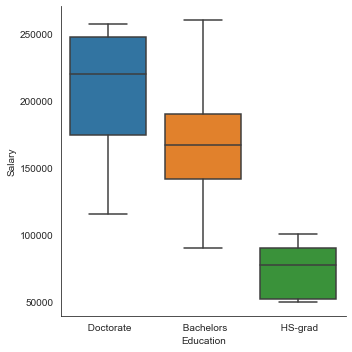

In [12]:
sns.catplot(data=salary,x='Education',y='Salary',kind='box');

In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [14]:
formula='Salary~C(Education)'
model=ols(formula,salary).fit()
aov_table_Edu=anova_lm(model)
aov_table_Edu

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

### The above is the ANOVA table for Education variable.
Since the p value = 1.257709e-08 is less than the significance level (alpha = 0.05), we can reject the null hypothesis and conclude that there is a significant difference in the mean salaries for at least one category of education.

### 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

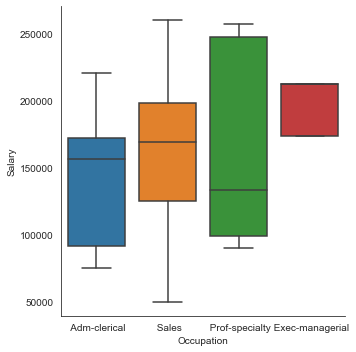

In [15]:
sns.catplot(data=salary,x='Occupation',y='Salary',kind='box');

In [16]:
formula='Salary~C(Occupation)'
model=ols(formula,salary).fit()
aov_table_Occu=anova_lm(model)
aov_table_Occu

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

### The above is the ANOVA table for Occupation variable.
Since the p value = 0.458508 is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis (i.e. we accept H0) and conclude that there is no significant difference in the mean salaries across the 4 categories of occupation.

### 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
mcomp1=pairwise_tukeyhsd(endog=salary.Salary,groups=salary.Education,alpha=0.05)
print(mcomp1)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


### The table shows that since the p- values(p-adj in the table) are lesser than the significance level for all the three categories of education, this implies that the mean salaries across all categories of education are different.

In [19]:
mcomp2=pairwise_tukeyhsd(endog=salary.Salary,groups=salary.Occupation,alpha=0.05)
print(mcomp2)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


### For the category occupation, the Tukey Honest Significant Difference test has further confirmed that the mean salaries across all occupation classes are significantly same. The table above confirms the same, wherein we see that all p-values are greater than 0.05.

### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

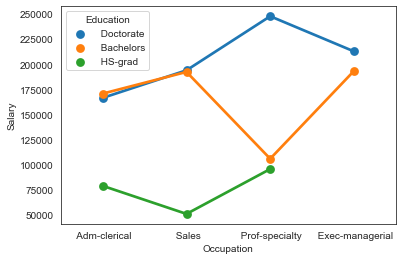

In [20]:
sns.pointplot(x=salary.Occupation,y=salary.Salary,data=salary,hue=salary.Education,ci=None);

### The interaction plot shows that there is significant amount of interaction between the categorical variables, Education and Occupation.
The following are some of the observations from the interaction plot:

People with HS-grad education do not reach the position of Exec-managerial and they hold only Adm-clerk, Sales and Prof-Specialty occupations.

People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries(salaries ranging from 170000–190000).

People with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupations as Adm-clerical and Sales.

People with education as Bachelors and occupation Sales earn higher than people with education as Bachelors and occupation Prof-Specialty whereas people with education as Doctorate and occupation Sales earn lesser than people with Doctorate and occupation Prof-Specialty. We see a reversal in this part of the plot.

Similarly, people with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupation Exec-Managerial whereas people with education as Doctorate and occupation as Prof-Specialty earn higher than people with education as Doctorate and occupation Exec-Managerial. There is a reversal in this part of the plot too.

Salespeople with Bachelors or Doctorate education earn the same salaries and earn higher than people with education as HS-grad.

Adm clerical people with education as HS-grad earn the lowest salaries when compared to people with education as Bachelors or Doctorate.

Prof-Specialty people with education as Doctorate earn maximum salaries and people with education as HS-Grad earn the minimum.

People with education as HS -Grad earn the minimum salaries.

There are no people with education as HS -grad who hold Exec-managerial occupation.

People with education as Bachelors and occupation, Sales and Exec-Managerial earn the same salaries.

### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

### 𝐻0: The effect of the independent variable ‘education’ on the mean ‘salary’ does not depend on the effect of the other independent variable ‘occupation’ (i. e. there is no interaction effect between the 2 independent variables, education and occupation).

### 𝐻1: There is an interaction effect between the independent variable ‘education’ and the independent variable ‘occupation’ on the mean Salary.

In [21]:
formula='Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
model=ols(formula,salary).fit()
aov_table_2way=anova_lm(model)
(aov_table_2way)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

### From the table, we see that there is a significant amount of interaction between the variables, Education and Occupation.
As p value = 2.232500e-05 is lesser than the significance level (alpha = 0.05), we reject the null hypothesis.
Thus, we see that there is an interaction effect between education and occupation on the mean salary.

### 1.7 Explain the business implications of performing ANOVA for this particular case study.

### From the ANOVA method and the interaction plot, we see that education combined with occupation results in higher and better salaries among the people. It is clearly seen that people with education as Doctorate draw the maximum salaries and people with education HS-grad earn the least. Thus, we can conclude that Salary is dependent on educational qualifications and occupation.

#### Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [22]:
education=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [23]:
education.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [24]:
education.shape

(777, 18)

In [25]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [26]:
education.duplicated().sum()

0

In [27]:
education.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

### 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### Univariate Analysis

In [28]:
def univariate(column):
    print('Description of ' + column)
    print("----------------------------------------------------------------------------")
    print(education[column].describe().round(2))
    print('\n')
    plt.figure()
    print('Distribution of ' + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(education[column],kde=True,color='g')
    plt.title('Distribution of ' + column)
    plt.show();
    plt.figure()
    print('Boxplot of ' + column)
    print("----------------------------------------------------------------------------")
    ax=sns.boxplot(y=education[column])
    plt.title('Boxplot of ' + column)
    plt.show();

Description of Apps
----------------------------------------------------------------------------
count      777.00
mean      3001.64
std       3870.20
min         81.00
25%        776.00
50%       1558.00
75%       3624.00
max      48094.00
Name: Apps, dtype: float64


Distribution of Apps
----------------------------------------------------------------------------


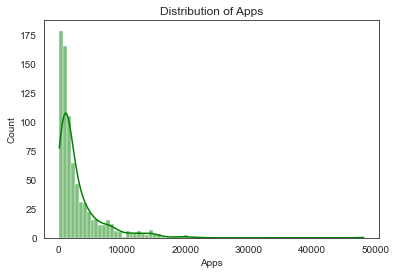

Boxplot of Apps
----------------------------------------------------------------------------


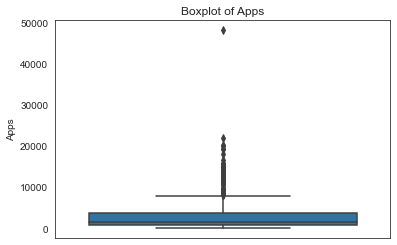

In [29]:
univariate('Apps')

Description of Accept
----------------------------------------------------------------------------
count      777.00
mean      2018.80
std       2451.11
min         72.00
25%        604.00
50%       1110.00
75%       2424.00
max      26330.00
Name: Accept, dtype: float64


Distribution of Accept
----------------------------------------------------------------------------


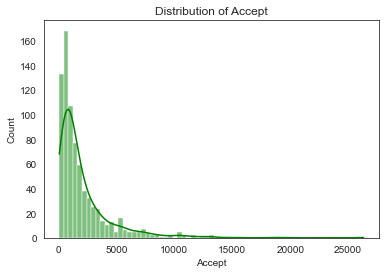

Boxplot of Accept
----------------------------------------------------------------------------


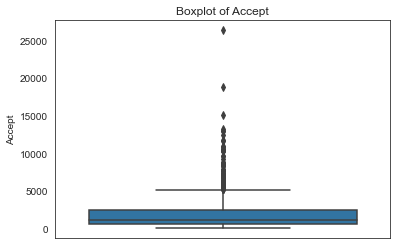

In [30]:
univariate('Accept')

Description of Enroll
----------------------------------------------------------------------------
count     777.00
mean      779.97
std       929.18
min        35.00
25%       242.00
50%       434.00
75%       902.00
max      6392.00
Name: Enroll, dtype: float64


Distribution of Enroll
----------------------------------------------------------------------------


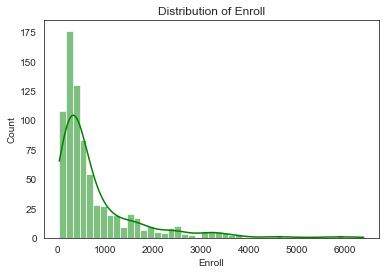

Boxplot of Enroll
----------------------------------------------------------------------------


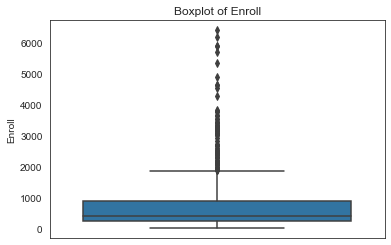

In [31]:
univariate('Enroll')

Description of Top10perc
----------------------------------------------------------------------------
count    777.00
mean      27.56
std       17.64
min        1.00
25%       15.00
50%       23.00
75%       35.00
max       96.00
Name: Top10perc, dtype: float64


Distribution of Top10perc
----------------------------------------------------------------------------


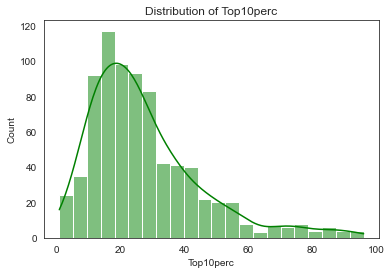

Boxplot of Top10perc
----------------------------------------------------------------------------


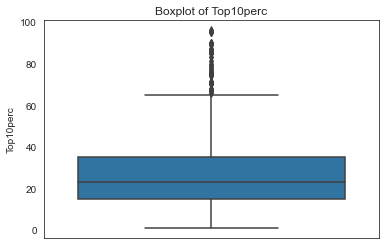

In [32]:
univariate('Top10perc')

Description of Top25perc
----------------------------------------------------------------------------
count    777.0
mean      55.8
std       19.8
min        9.0
25%       41.0
50%       54.0
75%       69.0
max      100.0
Name: Top25perc, dtype: float64


Distribution of Top25perc
----------------------------------------------------------------------------


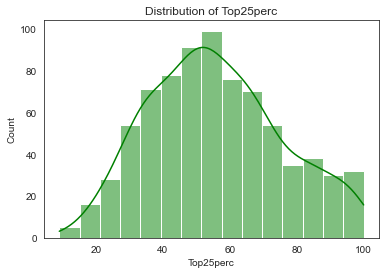

Boxplot of Top25perc
----------------------------------------------------------------------------


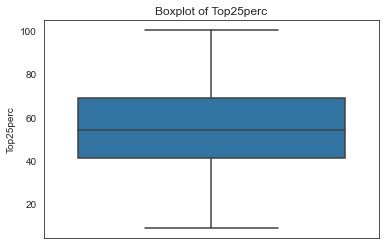

In [33]:
univariate('Top25perc')

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.00
mean      3699.91
std       4850.42
min        139.00
25%        992.00
50%       1707.00
75%       4005.00
max      31643.00
Name: F.Undergrad, dtype: float64


Distribution of F.Undergrad
----------------------------------------------------------------------------


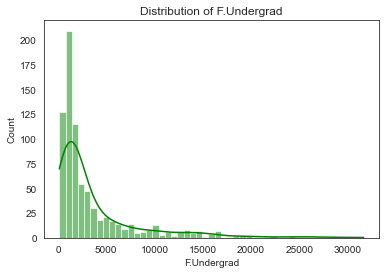

Boxplot of F.Undergrad
----------------------------------------------------------------------------


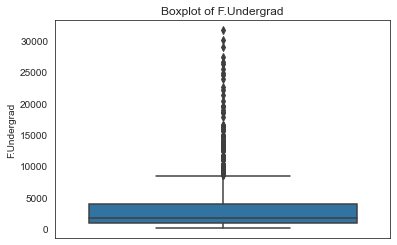

In [34]:
univariate('F.Undergrad')

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.00
mean       855.30
std       1522.43
min          1.00
25%         95.00
50%        353.00
75%        967.00
max      21836.00
Name: P.Undergrad, dtype: float64


Distribution of P.Undergrad
----------------------------------------------------------------------------


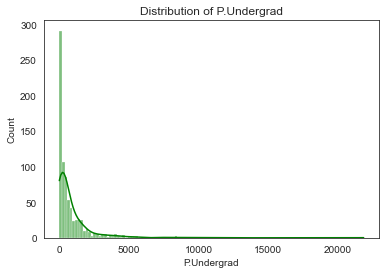

Boxplot of P.Undergrad
----------------------------------------------------------------------------


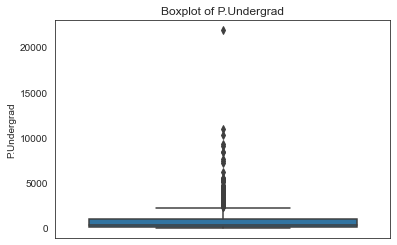

In [35]:
univariate('P.Undergrad')

Description of Outstate
----------------------------------------------------------------------------
count      777.00
mean     10440.67
std       4023.02
min       2340.00
25%       7320.00
50%       9990.00
75%      12925.00
max      21700.00
Name: Outstate, dtype: float64


Distribution of Outstate
----------------------------------------------------------------------------


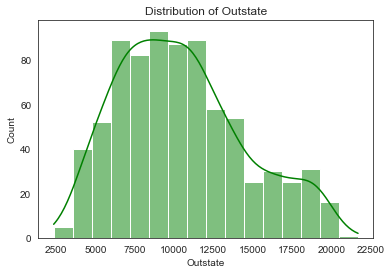

Boxplot of Outstate
----------------------------------------------------------------------------


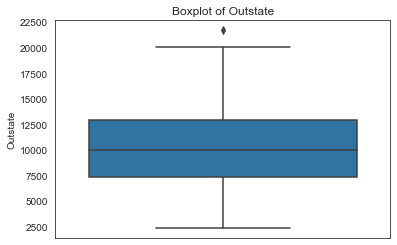

In [36]:
univariate('Outstate')

Description of Room.Board
----------------------------------------------------------------------------
count     777.00
mean     4357.53
std      1096.70
min      1780.00
25%      3597.00
50%      4200.00
75%      5050.00
max      8124.00
Name: Room.Board, dtype: float64


Distribution of Room.Board
----------------------------------------------------------------------------


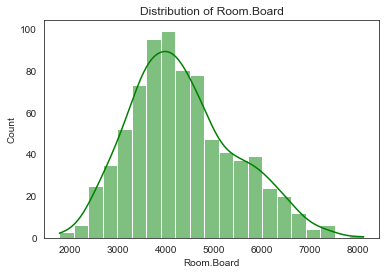

Boxplot of Room.Board
----------------------------------------------------------------------------


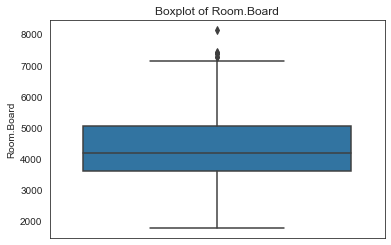

In [37]:
univariate('Room.Board')

Description of Books
----------------------------------------------------------------------------
count     777.00
mean      549.38
std       165.11
min        96.00
25%       470.00
50%       500.00
75%       600.00
max      2340.00
Name: Books, dtype: float64


Distribution of Books
----------------------------------------------------------------------------


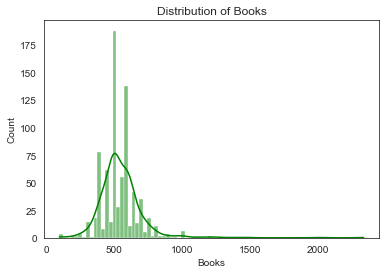

Boxplot of Books
----------------------------------------------------------------------------


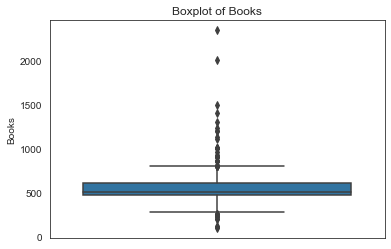

In [38]:
univariate('Books')

Description of Personal
----------------------------------------------------------------------------
count     777.00
mean     1340.64
std       677.07
min       250.00
25%       850.00
50%      1200.00
75%      1700.00
max      6800.00
Name: Personal, dtype: float64


Distribution of Personal
----------------------------------------------------------------------------


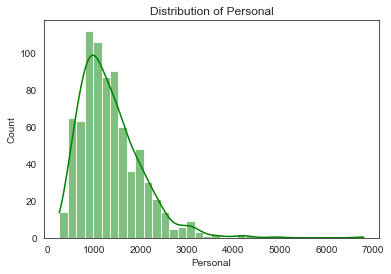

Boxplot of Personal
----------------------------------------------------------------------------


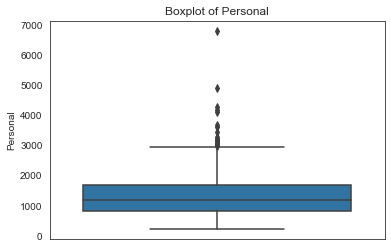

In [39]:
univariate('Personal')

Description of PhD
----------------------------------------------------------------------------
count    777.00
mean      72.66
std       16.33
min        8.00
25%       62.00
50%       75.00
75%       85.00
max      103.00
Name: PhD, dtype: float64


Distribution of PhD
----------------------------------------------------------------------------


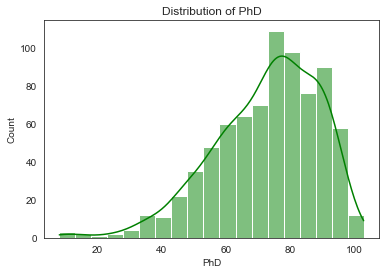

Boxplot of PhD
----------------------------------------------------------------------------


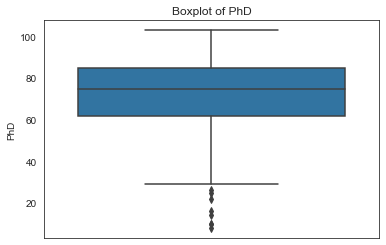

In [40]:
univariate('PhD')

Description of Terminal
----------------------------------------------------------------------------
count    777.00
mean      79.70
std       14.72
min       24.00
25%       71.00
50%       82.00
75%       92.00
max      100.00
Name: Terminal, dtype: float64


Distribution of Terminal
----------------------------------------------------------------------------


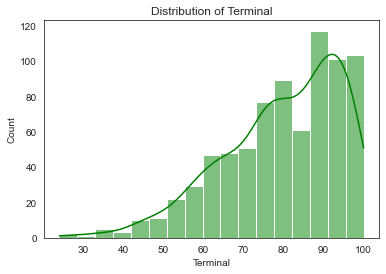

Boxplot of Terminal
----------------------------------------------------------------------------


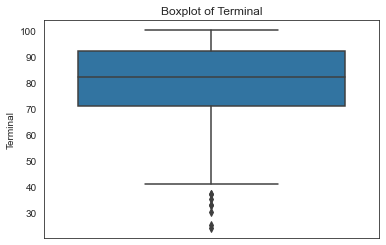

In [41]:
univariate('Terminal')

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.00
mean      14.09
std        3.96
min        2.50
25%       11.50
50%       13.60
75%       16.50
max       39.80
Name: S.F.Ratio, dtype: float64


Distribution of S.F.Ratio
----------------------------------------------------------------------------


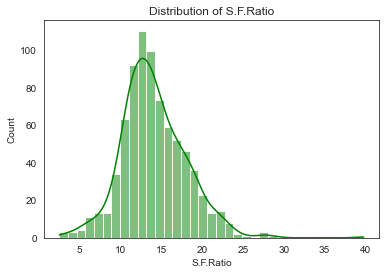

Boxplot of S.F.Ratio
----------------------------------------------------------------------------


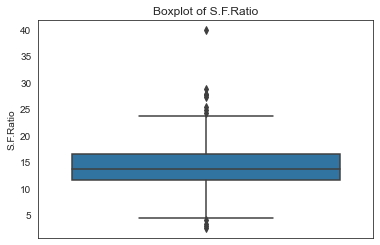

In [42]:
univariate('S.F.Ratio')

Description of perc.alumni
----------------------------------------------------------------------------
count    777.00
mean      22.74
std       12.39
min        0.00
25%       13.00
50%       21.00
75%       31.00
max       64.00
Name: perc.alumni, dtype: float64


Distribution of perc.alumni
----------------------------------------------------------------------------


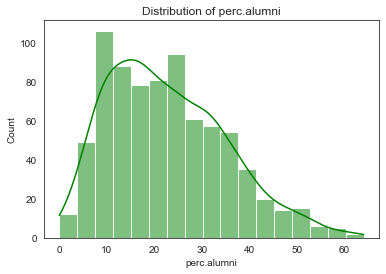

Boxplot of perc.alumni
----------------------------------------------------------------------------


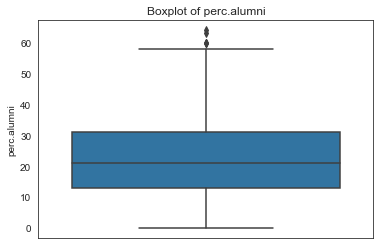

In [43]:
univariate('perc.alumni')

Description of Expend
----------------------------------------------------------------------------
count      777.00
mean      9660.17
std       5221.77
min       3186.00
25%       6751.00
50%       8377.00
75%      10830.00
max      56233.00
Name: Expend, dtype: float64


Distribution of Expend
----------------------------------------------------------------------------


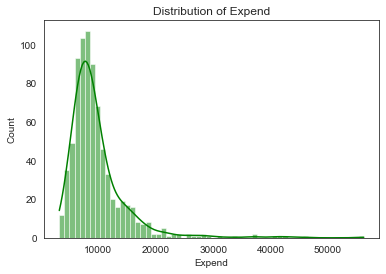

Boxplot of Expend
----------------------------------------------------------------------------


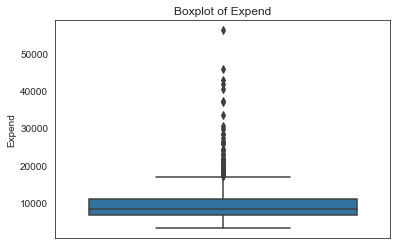

In [44]:
univariate('Expend')

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00
mean      65.46
std       17.18
min       10.00
25%       53.00
50%       65.00
75%       78.00
max      118.00
Name: Grad.Rate, dtype: float64


Distribution of Grad.Rate
----------------------------------------------------------------------------


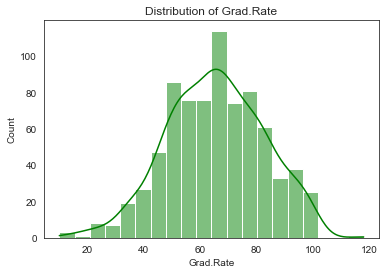

Boxplot of Grad.Rate
----------------------------------------------------------------------------


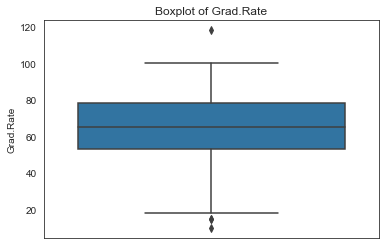

In [45]:
univariate('Grad.Rate')

### Multivariate Analysis

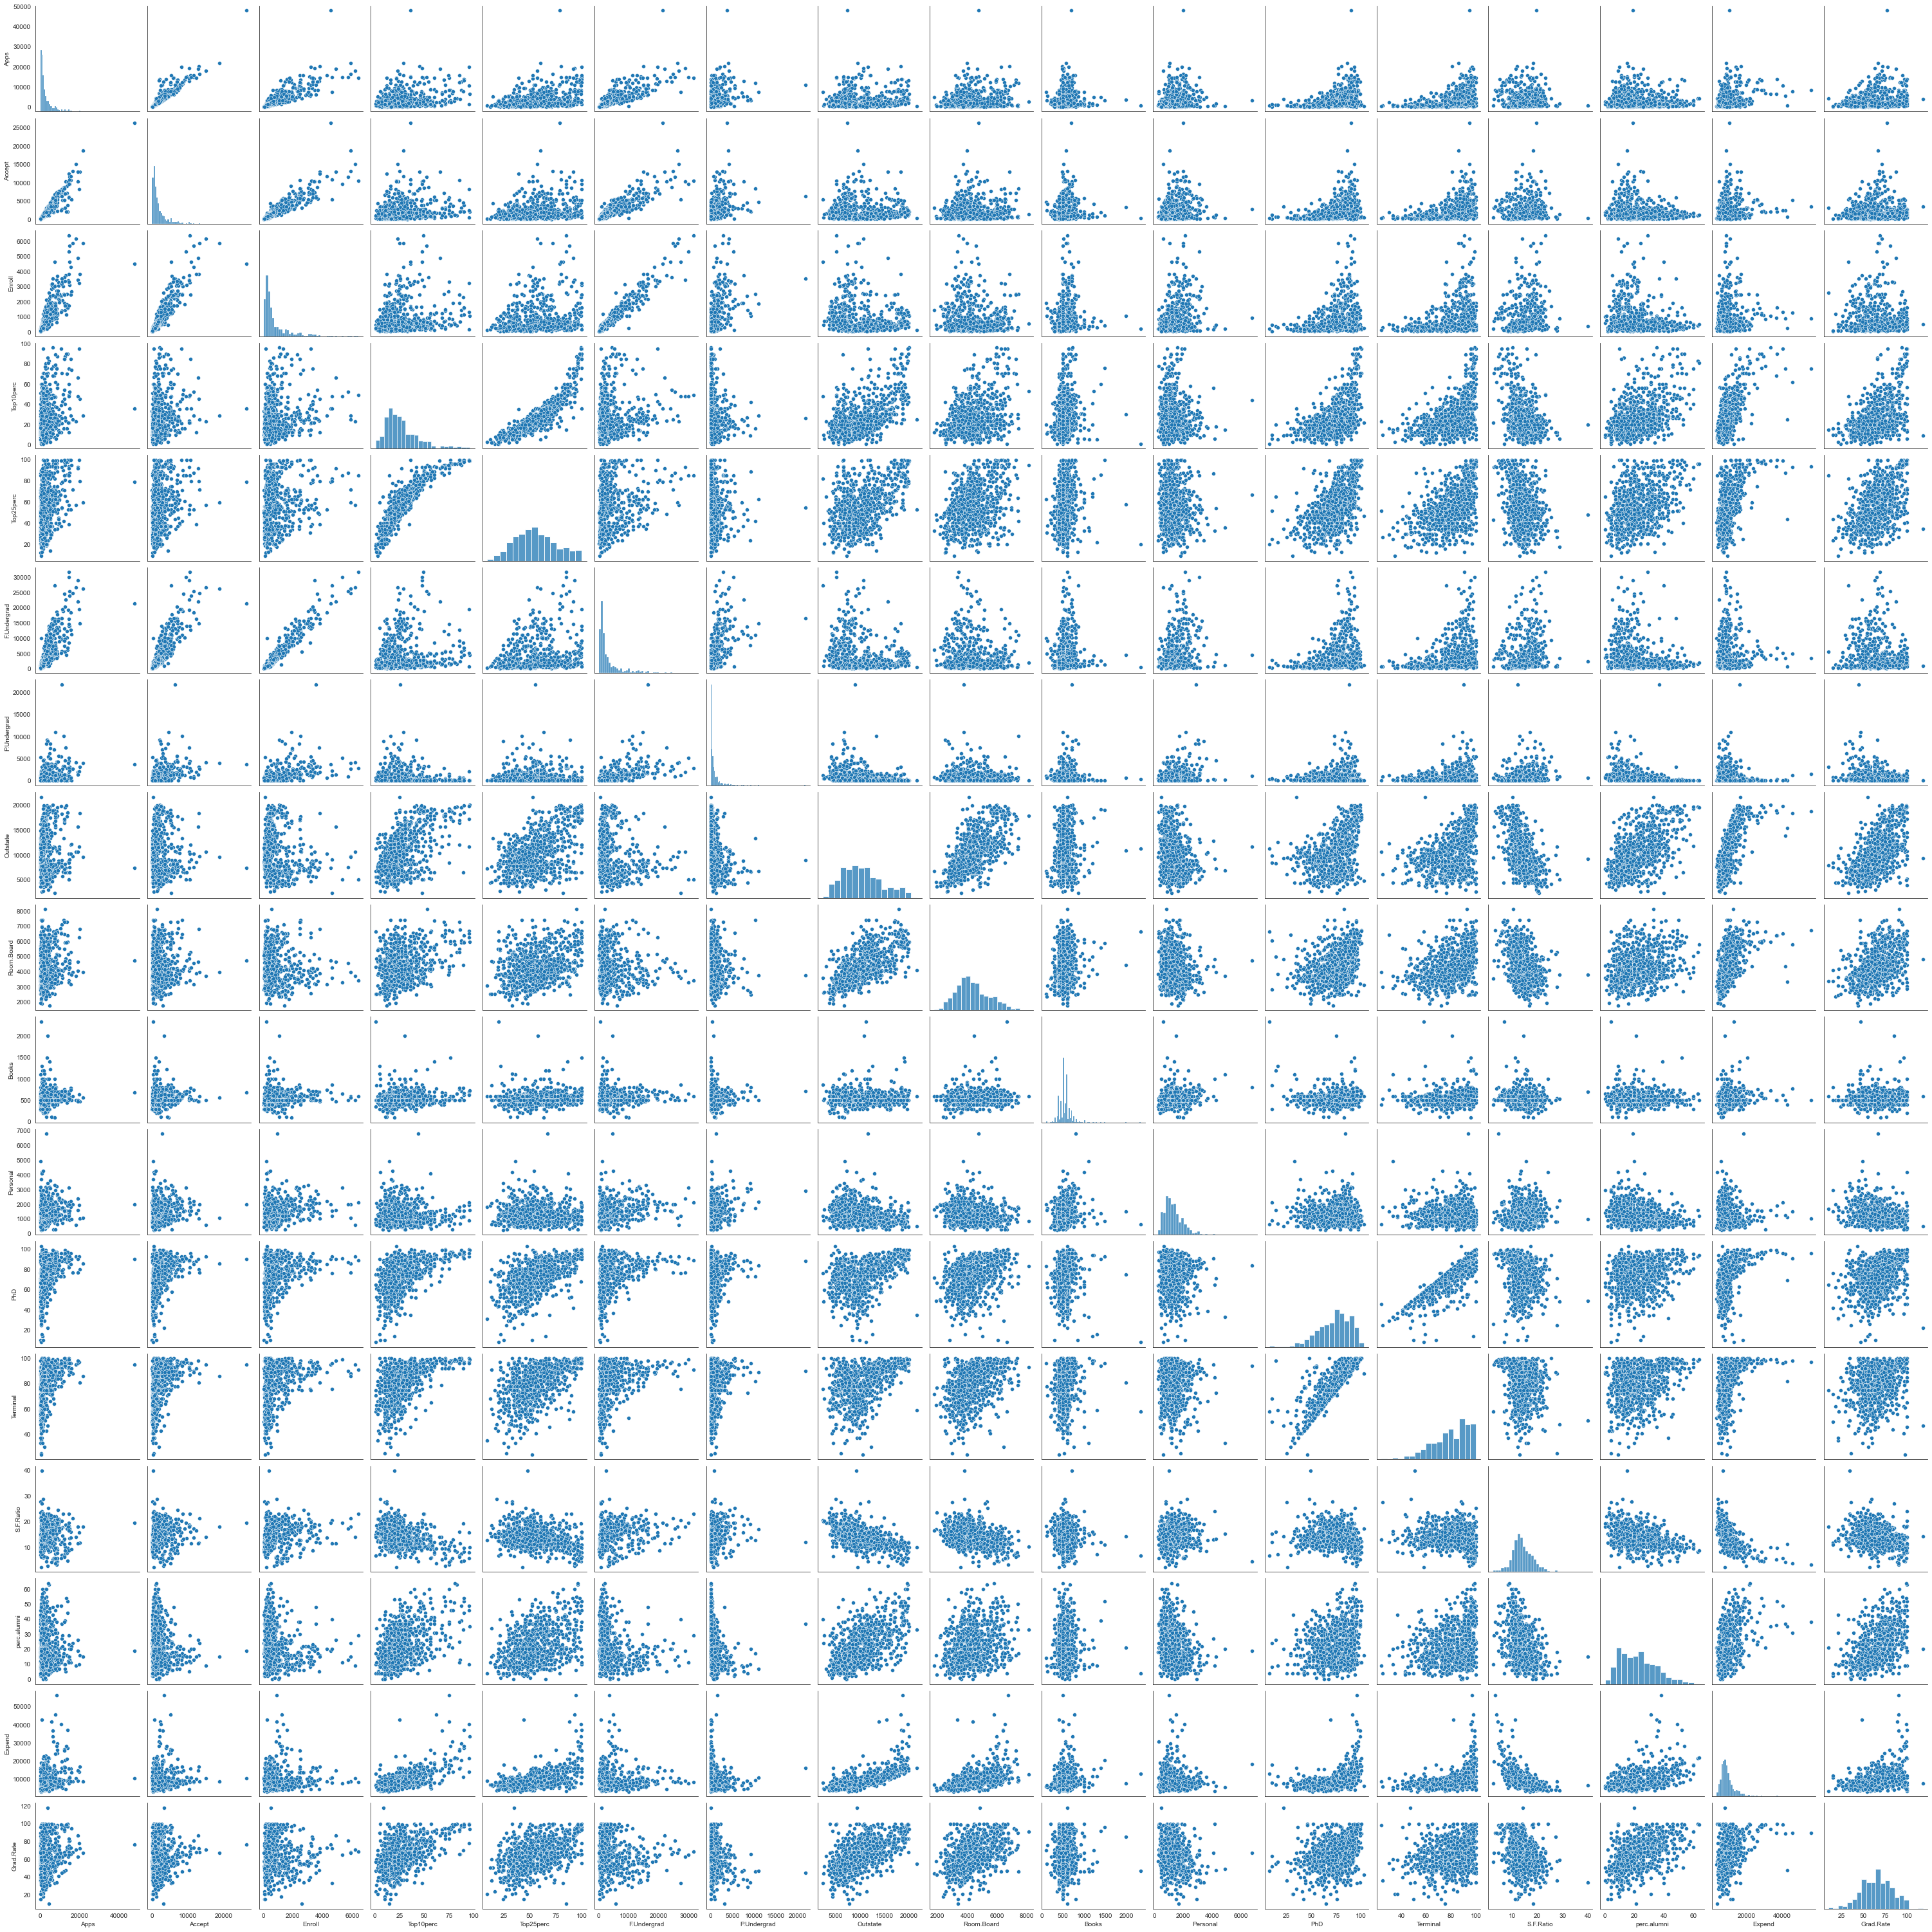

In [46]:
sns.pairplot(data=education);

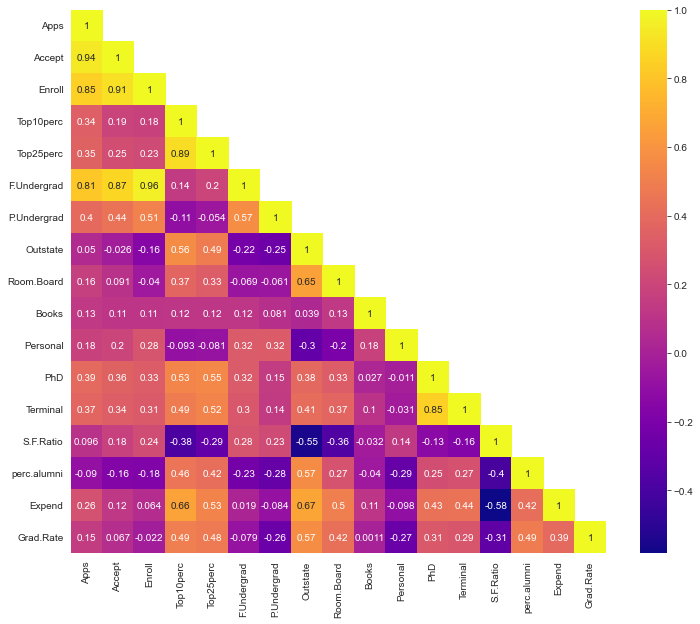

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(education.corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(education.corr(),+1));

### 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [48]:
edu_pca=education.drop(['Names'],axis=1)

In [49]:
edu_pca.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [50]:
edu_pca.shape

(777, 17)

In [51]:
from scipy.stats import zscore

In [52]:
edu_pca_z=edu_pca.apply(zscore)
edu_pca_z

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1   -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2   -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3   -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4   -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
..        ...       ...       ...        ...        ...          ...   
772 -0.208040 -0.205673 -0.255200  -1.336352  -1.505488    -0.126030   
773 -0.269575 -0.087284 -0.091509  -0.201858  -0.444454    -0.175543   
774 -0.233895 -0.042377 -0.091509   0.365389   0.262901    -0.187095   
775  1.991711  0.177256  0.578333   3.825595   2.182866     0.312977   
776 -0.003268 -0.066872 -0.095816   0.025041   0.363952    -0.146867   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028   
1       0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646   
2      -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845   
3      -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206   
4       0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672   
..           ...       ...         ...       ...       ...       ...   
772     0.771435 -0.906289   -0.417455 -0.299280 -0.207855 -0.775861   
773     0.165435  0.268462    0.549707  0.306784 -0.133960  0.020822   
774    -0.453053 -0.880670   -0.143730  0.409815 -0.827095 -0.346878   
775    -0.507606  2.337894    1.963953  0.488603  1.144424  1.430339   
776     0.572283 -1.355744   -0.727676 -0.299280 -0.133960  0.143389   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.115729   1.013776    -0.867574 -0.501910  -0.318252  
1   -3.378176  -0.477704    -0.544572  0.166110  -0.551262  
2   -0.931341  -0.300749     0.585935 -0.177290  -0.667767  
3    1.175657  -1.615274     1.151188  1.792851  -0.376504  
4   -0.523535  -0.553542    -1.675079  0.241803  -2.939613  
..        ...        ...          ...       ...        ...  
772 -1.339146   1.746877    -0.706073 -0.994781  -1.483301  
773 -0.319632  -0.199632     0.666685 -0.090290   1.021555  
774 -0.319632   0.078441    -0.221570 -0.256241  -0.959029  
775  1.107689  -2.095582     2.120194  5.887971   1.953595  
776 -0.319632   1.013776     0.424434 -0.987116   1.953595  

[777 rows x 17 columns]

### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [53]:
cov_matrix = np.cov(edu_pca_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [54]:
corr=edu_pca_z.corr()
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

In [55]:
len(edu_pca.columns)

17

In [56]:
len(edu_pca_z.columns)

17

### check for outliers before scaling

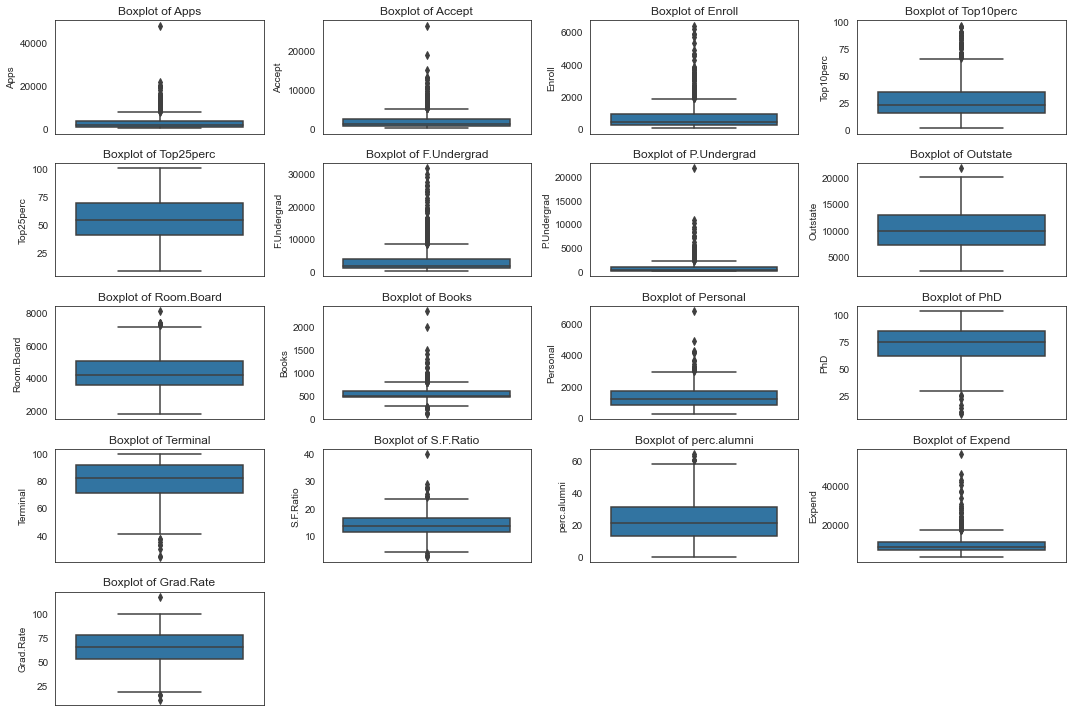

In [57]:
plt.figure(figsize=(15,10))
feature_list=edu_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=edu_pca[feature_list[i]],data=edu_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

###  check for outliers after scaling

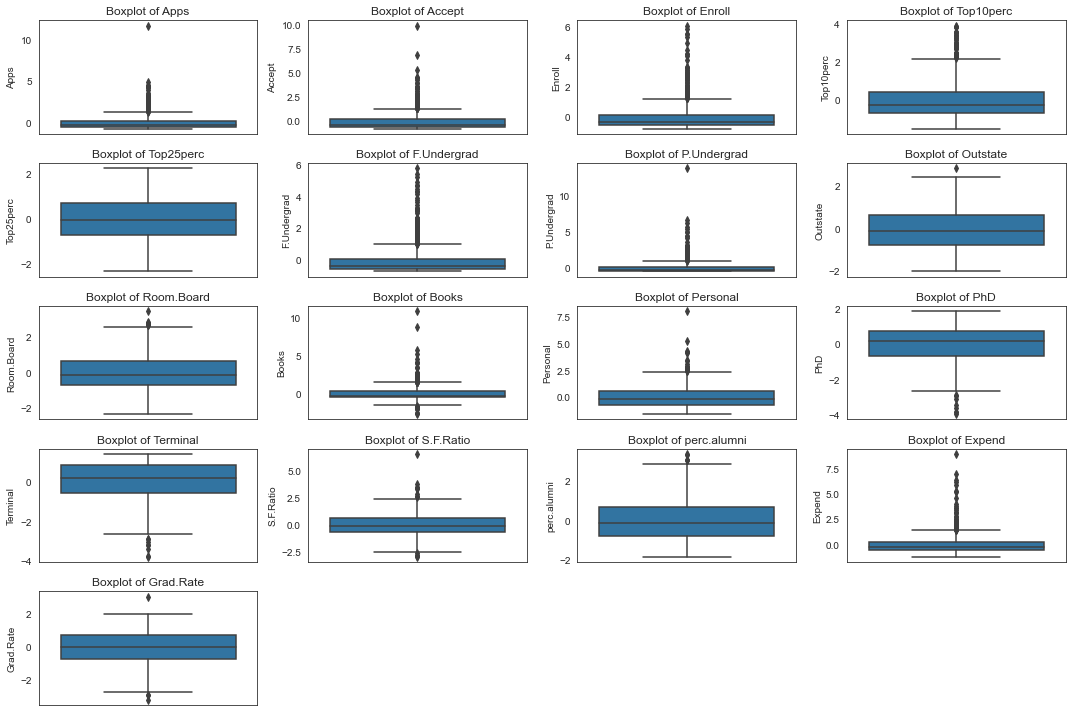

In [58]:
plt.figure(figsize=(15,10))
feature_list=edu_pca_z.columns
for i in range(len(feature_list)):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=edu_pca_z[feature_list[i]],data=edu_pca_z)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [59]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sq,p_value=calculate_bartlett_sphericity(edu_pca_z)
p_value

0.0

In [60]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(edu_pca_z)
kmo_model

0.8131251200373523

In [61]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca=PCA(n_components=17,random_state=123)
pca_transformed=pca.fit_transform(edu_pca_z)
pca_transformed

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         1.75239502e-03, -9.31400698e-02,  9.35522023e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.03709803e-01, -5.02556890e-02, -1.74057054e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.25582869e-02, -4.05268301e-03,  3.75875882e-03],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
         6.79013123e-02, -2.32023970e-01, -9.99380421e-02],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         3.53597440e-01,  3.04416200e-01,  3.35104811e-01],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.14873492e-01, -1.17076127e-01, -2.57218339e-03]])

In [62]:
pca_transformed.shape

(777, 17)

In [63]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [64]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [65]:
pca.explained_variance_.sum()

17.02190721649484

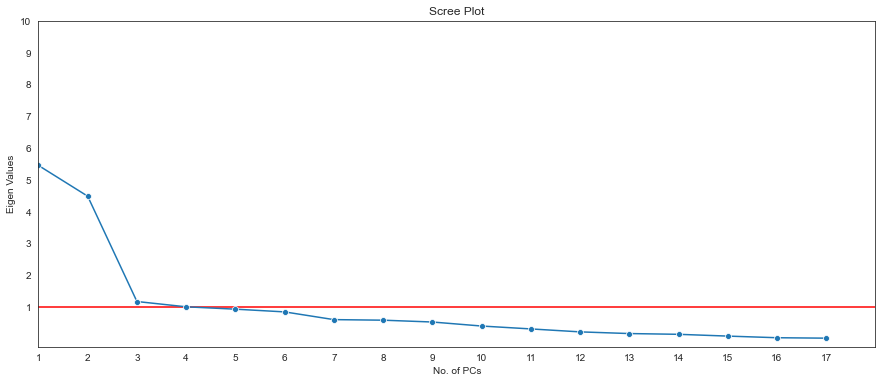

In [66]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x=range(1,len(pca.explained_variance_)+1),y=pca.explained_variance_,marker='o')
plt.ylabel('Eigen Values')
plt.xlabel('No. of PCs');
ax.hlines(1,0,33, colors='red')
plt.yticks(range(1,11))
plt.xticks(range(1,18))
plt.xlim(1,18)
plt.title('Scree Plot');

##### As per the Kaiser's rule, we need to consider only those principal components that have a eigen value of more than 1, since if eigen value is less than 1, it means that the PC does not do the job of even a lone original variable. So, going by this rule it appears that 6 is the ideal number of principal components to take to reduce the dimensions of the original dataset. Because PC6 is just below 1, rest others are not doing the job of a lone original variable.

### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [67]:
#Create a dataframe containing the loadings or coefficients of all PCs
edu_extracted_loadings=pd.DataFrame(pca.components_.T,columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17'],
                                    index = edu_pca_z.columns)

In [68]:
edu_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

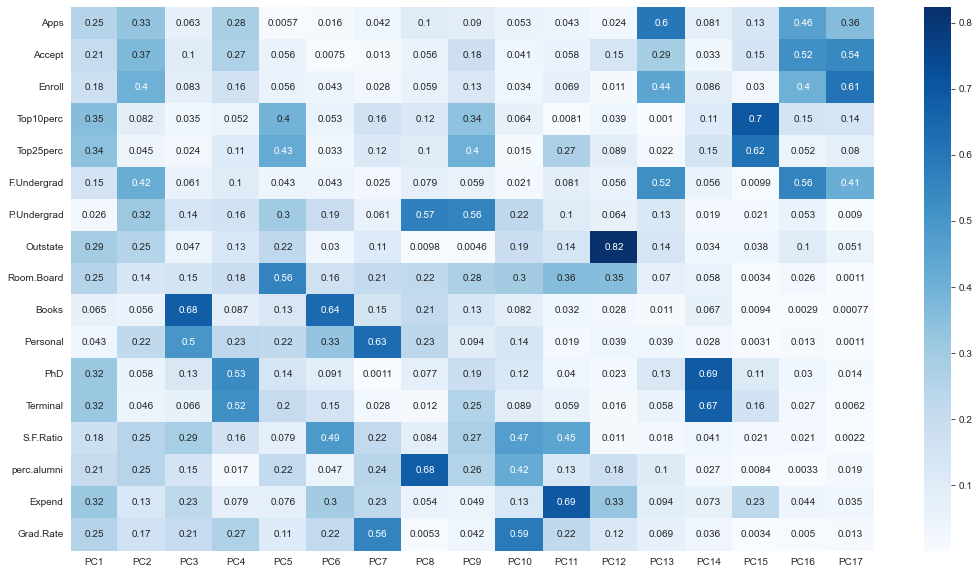

In [87]:
plt.figure(figsize=(18,10))
sns.heatmap(abs(edu_extracted_loadings),cmap='Blues',fmt='.2g',annot=True);

### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [69]:
print('The Linear Equation of first component: ')
for i in range(0,edu_pca_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),edu_pca_z.columns[i]),end= ' + ')

The Linear Equation of first component: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [70]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
cum_exp_var_ratio=np.cumsum(pca.explained_variance_ratio_*100).round(2)

In [71]:
cum_exp_var_ratio

array([ 32.02,  58.36,  65.26,  71.18,  76.67,  81.66,  85.22,  88.67,
        91.79,  94.16,  96.  ,  97.3 ,  98.29,  99.13,  99.65,  99.86,
       100.  ])

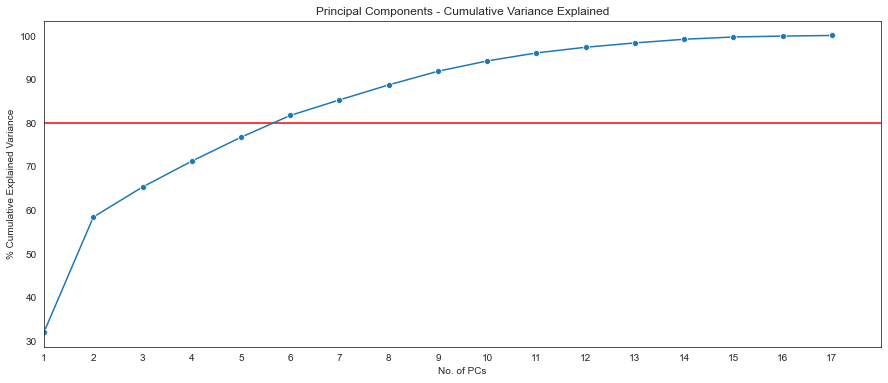

In [72]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x=range(1,len(cum_exp_var_ratio)+1),y=cum_exp_var_ratio,marker='o')
plt.ylabel('% Cumulative Explained Variance')
plt.xlabel('No. of PCs');
ax.hlines(80,0,18, colors='red') 
plt.xticks(range(1,18))
plt.xlim(1,18)
plt.title('Principal Components - Cumulative Variance Explained');

### Reducing the number of Principal Components

##### Looking at the cumulative variance explained plot, assuming that we are ok with 80% of the variance in data being explained while reducing the features, we see that, here too considering only the top 6 principal components does the job. So we will consider only the top 6 principal components, thereby reducing the original dimensions of the data from 17 numeric features to just 6 components, while still being able to account for 80% of the original variations in data.

In [73]:
edu_selected = edu_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [74]:
edu_selected

PC1       PC2       PC3       PC4       PC5       PC6
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163

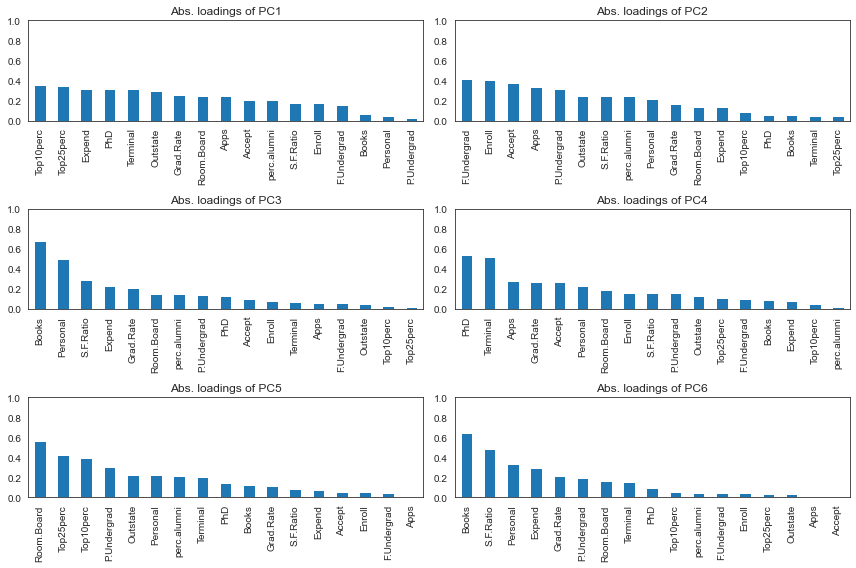

In [75]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(edu_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(edu_selected[edu_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(edu_selected.columns[i]))
    plt.tight_layout()

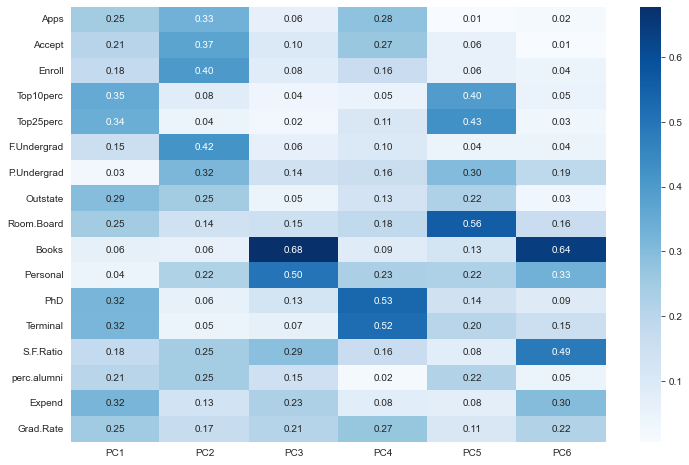

In [76]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(edu_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [77]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(edu_pca_z)

In [78]:
pca_final_df = pd.DataFrame(pca_final, columns = edu_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668343
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401

In [79]:
pca_final_df

PC1       PC2       PC3       PC4       PC5       PC6
0   -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1   -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2   -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3    2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4   -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
..        ...       ...       ...       ...       ...       ...
772 -3.328458  1.220255 -0.383388  0.108555  0.776996  0.309429
773  0.199389 -0.686689  0.051563  0.562269  0.375191  0.373343
774 -0.732561 -0.077235 -0.000406  0.054316 -0.516021  0.468014
775  7.919327 -2.068329  2.073564  0.852054 -0.947755 -2.069937
776 -0.469508  0.366661 -1.328915 -0.108022 -1.132176  0.839893

[777 rows x 6 columns]

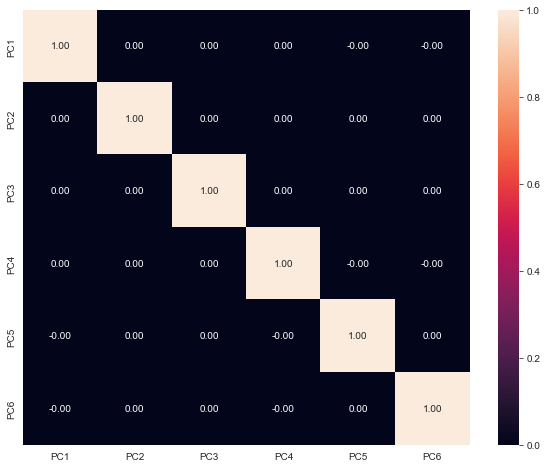

In [80]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

#### This business case study is about education dataset which contain the names of various colleges, which has various details of colleges and university. To understand more about the dataset we perform univariate analysis and multivariate analysis which gives us the understanding about the variables. From analysis we can understand the distribution of the dataset, skew, and patterns in the dataset. From multivariate analysis we can understand the correlation of variables. Inference of multivariate analysis shows we can understand multiple variables highly correlated with each other. The scaling helps the dataset to standardize the variable in one scale. Outliers are imputed using IQR values once the values are imputed we can perform PCA. The principal component analysis is used reduce the multicollinearitybetween the variables. Depending on the variance of the dataset we can reduce the PCA components. The PCA components for this business case is 6 where we could understand the maximum variance of the dataset. Using the components we can now understand the reduced multicollinearity in the dataset. With this analysis we can perform further analysis and model building PCA will improve the efficiency of machine learning models.